In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from scipy.optimize import curve_fit
import glob
from scipy.interpolate import interp1d as i1

In [2]:
jfo_0507 = ascii.read('SN2020jfo_20200507_redblu_130458.033.ascii', format = 'no_header')
jfo_0508 = ascii.read('SN2020jfo_20200508_redblu_130804.977.ascii', format = 'no_header')
jfo_0512 = ascii.read('SN2020jfo_20200512_redblu_083808.860.ascii', format = 'no_header') 
jfo_0516 = ascii.read('SN2020jfo_20200516_redblu_114620.495.ascii', format = 'no_header') 
jfo_0519 = ascii.read('SN2020jfo_20200519_redblu_120343.217.ascii', format = 'no_header') 
jfo_0523 = ascii.read('SN2020jfo_20200523_KAST.csv', format = 'csv', header_start = 18, data_start = 19)#KAST 
jfo_0524 = ascii.read('SN2020jfo_20200524_redblu_105947.534.ascii', format = 'no_header') 
jfo_0528 = ascii.read('SN2020jfo_20200528_redblu_113620.751.ascii', format = 'no_header') 
jfo_0605 = ascii.read('SN2020jfo_20200605_redblu_113353.824.ascii', format = 'no_header') 
jfo_0613 = ascii.read('SN2020jfo_20200613_redblu_071655.424.ascii', format = 'no_header') 
jfo_0626 = ascii.read('SN2020jfo_20200626_redblu_063302.731.ascii', format = 'no_header') 
jfo_0706 = ascii.read('SN2020jfo_20200706_redblu_101237.107.ascii' , format = 'no_header') 
jfo_0714 = ascii.read('SN2020jfo_20200714_redblu_061749.943.ascii', format = 'no_header') 
jfo_0723 = ascii.read('SN2020jfo_20200723_redblu_060251.843.ascii', format = 'no_header') 
jfo_0727 = ascii.read('SN2020jfo_20200727_KAST.csv', format = 'csv', header_start = 18, data_start = 19) #KAST 
jfo_0801 = ascii.read('SN2020jfo_20200801_redblu_082611.283.ascii', format = 'no_header') 
jfo_210212 = ascii.read('SN2020jfo_20210212_LRIS.csv', format = 'csv', header_start = 18, data_start = 19)  #LRIS
jfo_210510 = ascii.read('SN2020jfo_20210510_LRIS.csv', format = 'csv', header_start = 18, data_start = 19) #LRIS 


<>:35: SyntaxWarning: invalid escape sequence '\A'
<>:46: SyntaxWarning: invalid escape sequence '\A'
<>:35: SyntaxWarning: invalid escape sequence '\A'
<>:46: SyntaxWarning: invalid escape sequence '\A'
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/3413711214.py:35: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/3413711214.py:46: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)


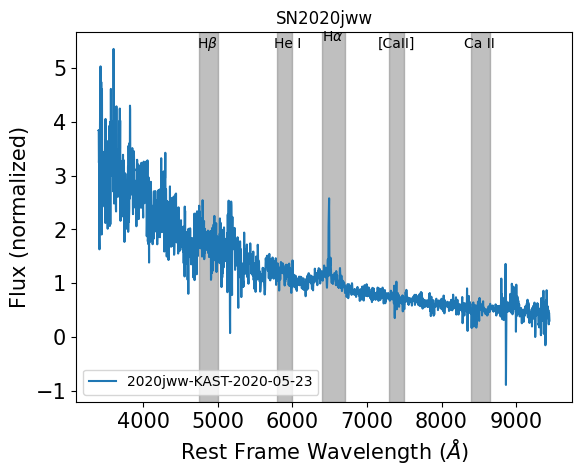

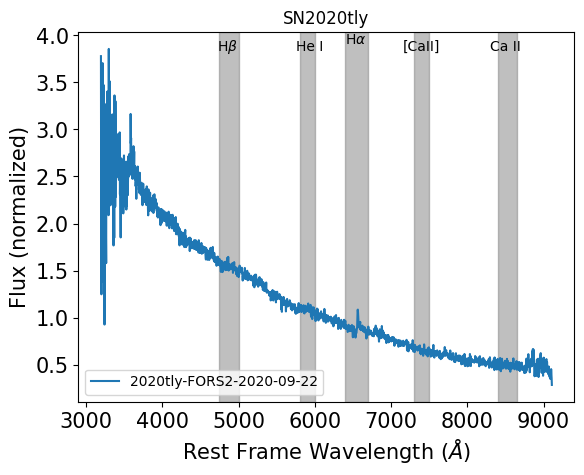

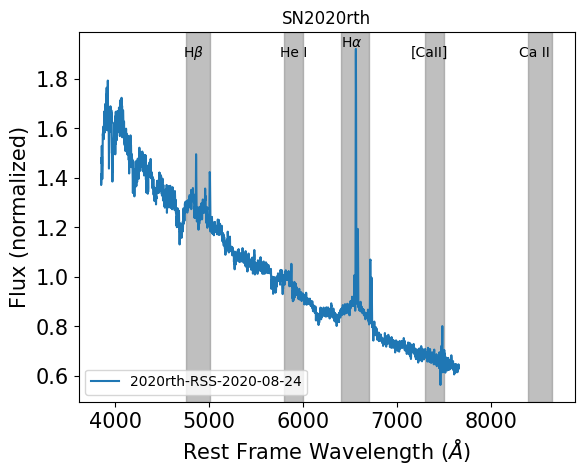

In [3]:
redshifts = [0.043, 0.005, 0.046, 0.0184, 0.058] 
spectra = glob.glob("*.csv")
for idx, file in enumerate(spectra):
    if 'jfo' in file:
        continue 
    if 'hgw' in file:
        continue
    object = ascii.read(file, format = 'csv', header_start = 18, data_start = 19)
    #print(object)
    wavelength = object['wavelength']
    flux = object['flux'] 
    if 'hgw' in file:
        z = redshifts[0]
    elif 'jfo' in file:
        z = redshifts[1] 
    elif 'ovk' in file:
        z = redshifts[2] 
    elif 'rth' in file:
        z = redshifts[3]
    
    else:
        z = redshifts[4]
    label = file.split('.')[0]
    plt.figure(idx)
    plt.title('SN' + file.split('-')[0])
    plt.plot(wavelength / ( 1 + z), flux / np.median(flux), label = label)
    
    ymin, ymax = plt.ylim()
    
    
    plt.axvspan(4750, 5010, color='grey', alpha = 0.5)
    plt.text(4720, ymax*0.95, r'H$\beta$', fontsize = 10)
    plt.axvspan(5800, 6000, color = 'grey', alpha= 0.5)
    plt.text(5750, ymax*0.95, r'He I', fontsize = 10)
    plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
    plt.axvspan(6400, 6700, color = 'grey', alpha = 0.5)
    plt.text(6400, ymax*.97, r'H$\alpha$', fontsize = 10)
    plt.axvspan(7300, 7500, color = 'grey', alpha =0.5)
    plt.text(7150, ymax*0.95, '[CaII]', fontsize = 10)
    plt.axvspan(8400, 8650, color = 'grey', alpha=0.5)
    plt.text(8300, ymax*0.95, 'Ca II', fontsize = 10)
    plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(loc='lower left')
    plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
    plt.ylabel('Flux (normalized)', fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.legend(loc = 'lower left')

        


In [4]:
hgw_ALFOSC = ascii.read('2020hgw-ALFOSC-2020-04-29.csv', format = 'csv', header_start = 18, data_start = 19)
hgw_KAST = ascii.read('2020hgw-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
jww_KAST = ascii.read('2020jww-KAST-2020-05-23.csv', format = 'csv', header_start = 18, data_start = 19)
rth = ascii.read('2020rth-RSS-2020-08-24.csv', format = 'csv', header_start = 18, data_start = 19)
#tly = ascii.read('2020tly-FORS2-2020-09-22.csv', format = 'csv', header_start = 18, data_start = 19)

NOW WE START NA ID ANALYSIS AYOOOOOOOOOOO

FOR NOW IMA DO IT INVIVIDUALLY BUT I WILL ONE DAY MAKE IT A FUNCTION 

In [5]:
na_rest_wavelength = 5892

<>:16: SyntaxWarning: invalid escape sequence '\A'
<>:16: SyntaxWarning: invalid escape sequence '\A'
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/3728812463.py:16: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)


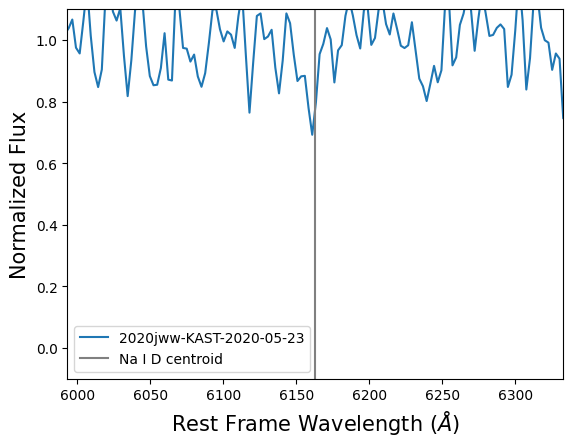

In [6]:
# gonna start with jww since i don't have to stack anything 
jww_centroid = na_rest_wavelength * (1 + redshifts[2])
jww_KAST_wavelength = jww_KAST['wavelength']
jww_KAST_flux = jww_KAST['flux'] 
lower_mask_jww = jww_centroid - 20
upper_mask_jww = jww_centroid + 20
mask_jww = (jww_KAST_wavelength > lower_mask_jww) & (jww_KAST_wavelength < upper_mask_jww)
continuum_jww = ((jww_KAST_wavelength > (lower_mask_jww - 150))&(jww_KAST_wavelength < (lower_mask_jww - 10))|(jww_KAST_wavelength > (upper_mask_jww + 10))&(jww_KAST_wavelength < (upper_mask_jww + 150)))
coeff_jww = np.polyfit(jww_KAST_wavelength[continuum_jww], jww_KAST_flux[continuum_jww], 2)
p_jww = np.poly1d(coeff_jww)
jww_flux_norm = jww_KAST_flux / p_jww(jww_KAST_wavelength)
plt.plot(jww_KAST_wavelength, jww_flux_norm, label = '2020jww-KAST-2020-05-23')
plt.xlim((lower_mask_jww - 150), (upper_mask_jww + 150))
plt.axvline(jww_centroid, color = 'grey', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.legend()



the width of the absorption line is too small for there to be significant host reddening, so we can say it's 0

<>:15: SyntaxWarning: invalid escape sequence '\A'
<>:15: SyntaxWarning: invalid escape sequence '\A'
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/1082229358.py:15: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)


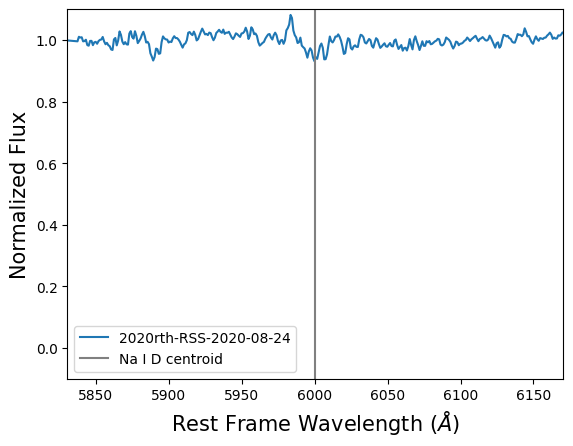

In [7]:
#rth time 
rth_centroid = na_rest_wavelength * (1 + redshifts[3])
rth_wavelength = rth['wavelength']
rth_flux = rth['flux']
lower_mask_rth = rth_centroid - 20 
upper_mask_rth = rth_centroid + 20 
mask_rth = (rth_wavelength > lower_mask_rth) & (rth_wavelength < upper_mask_rth)
continuum_rth = ((rth_wavelength > (lower_mask_rth - 150))&(rth_wavelength < (lower_mask_rth - 10))|(rth_wavelength > (upper_mask_rth + 10))&(rth_wavelength <(upper_mask_rth + 150)))
coeff_rth = np.polyfit(rth_wavelength[continuum_rth], rth_flux[continuum_rth],2)
p_rth = np.poly1d(coeff_rth)
rth_flux_norm = rth_flux / p_rth(rth_wavelength) 
plt.plot(rth_wavelength, rth_flux_norm, label = '2020rth-RSS-2020-08-24')
plt.xlim((lower_mask_rth - 150), (upper_mask_rth + 150))
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.axvline(rth_centroid, color = 'grey', label = 'Na I D centroid')
plt.legend()


In [8]:
rth_centroid

6000.4128

3600.245
3600.245


<>:48: SyntaxWarning: invalid escape sequence '\A'
<>:48: SyntaxWarning: invalid escape sequence '\A'
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/594799466.py:48: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)


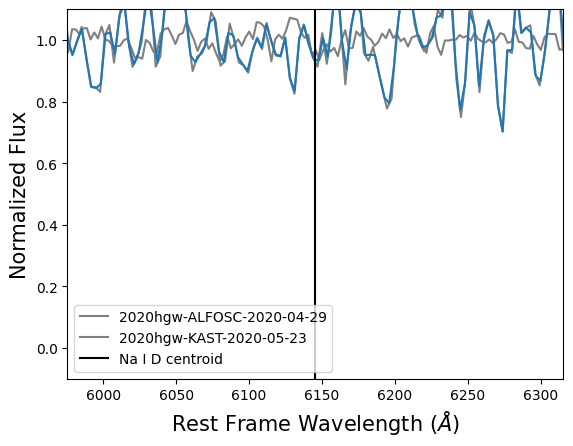

In [9]:
# hgw 
hgw_centroid = na_rest_wavelength * (1 + redshifts[0])
hgw_ALFOSC_wavelength = hgw_ALFOSC['wavelength']
hgw_ALFOSC_flux = hgw_ALFOSC['flux'] 
lower_mask_hgw_ALFOSC = hgw_centroid - 20
upper_mask_hgw_ALFOSC = hgw_centroid + 20
mask_hgw_ALFOSC = (hgw_ALFOSC_wavelength > lower_mask_hgw_ALFOSC) & (hgw_ALFOSC_wavelength < upper_mask_hgw_ALFOSC)
continuum_hgw_ALFOSC = ((hgw_ALFOSC_wavelength > (lower_mask_hgw_ALFOSC - 150))&(hgw_ALFOSC_wavelength < (lower_mask_hgw_ALFOSC - 10))|(hgw_ALFOSC_wavelength > (upper_mask_hgw_ALFOSC + 10))&(hgw_ALFOSC_wavelength < (upper_mask_hgw_ALFOSC + 150)))
coeff_hgw_ALFOSC= np.polyfit(hgw_ALFOSC_wavelength[continuum_hgw_ALFOSC], hgw_ALFOSC_flux[continuum_hgw_ALFOSC], 2)
p_hgw_ALFOSC = np.poly1d(coeff_hgw_ALFOSC)
hgw_ALFOSC_flux_norm = hgw_ALFOSC_flux / p_hgw_ALFOSC(hgw_ALFOSC_wavelength)
#stacking 
hgw_KAST_wavelength = hgw_KAST['wavelength']
hgw_KAST_flux = hgw_KAST['flux'] 
lower_mask_hgw_KAST = hgw_centroid - 20
upper_mask_hgw_KAST = hgw_centroid + 20
mask_hgw_KAST = (hgw_KAST_wavelength > lower_mask_hgw_KAST) & (hgw_KAST_wavelength < upper_mask_hgw_KAST)
continuum_hgw_KAST = ((hgw_KAST_wavelength > (lower_mask_hgw_KAST - 150))&(hgw_KAST_wavelength < (lower_mask_hgw_KAST - 10))|(hgw_KAST_wavelength > (upper_mask_hgw_KAST + 10))&(hgw_KAST_wavelength < (upper_mask_hgw_KAST + 150)))
coeff_hgw_KAST= np.polyfit(hgw_KAST_wavelength[continuum_hgw_KAST], hgw_KAST_flux[continuum_hgw_KAST], 2)
p_hgw_KAST = np.poly1d(coeff_hgw_KAST)
hgw_KAST_flux_norm = hgw_KAST_flux / p_hgw_KAST(hgw_KAST_wavelength)

hgw_wl = np.linspace(min(hgw_KAST_wavelength[0], hgw_ALFOSC_wavelength[0]), max(hgw_KAST_wavelength[-1], hgw_ALFOSC_wavelength[-1]),int((len(hgw_ALFOSC_wavelength)+len(hgw_KAST_wavelength))/2))
interp_hgw_KAST_fxn = i1(hgw_KAST_wavelength, hgw_KAST_flux, fill_value="extrapolate")
interp_hgw_ALFOSC_fxn = i1(hgw_ALFOSC_wavelength, hgw_ALFOSC_flux, fill_value="extrapolate")
print(min(hgw_KAST_wavelength[0], hgw_ALFOSC_wavelength[0]))
print(min(hgw_wl))
interp_hgw_KAST_flux = interp_hgw_KAST_fxn(hgw_wl)
interp_hgw_ALFOSC_flux = interp_hgw_ALFOSC_fxn(hgw_wl)
hgw_avg_flux = (interp_hgw_ALFOSC_flux + interp_hgw_KAST_flux) / 2 

hgw_lower_mask = hgw_centroid - 20 
hgw_upper_mask = hgw_centroid + 20 
hgw_mask = (hgw_wl > hgw_lower_mask) & (hgw_wl < hgw_upper_mask)
hgw_cont = ((hgw_wl > (hgw_lower_mask - 150))&(hgw_wl < (hgw_lower_mask - 10))|(hgw_wl > (hgw_upper_mask + 10))&(hgw_wl < (hgw_upper_mask + 150)))
coeff_hgw = np.polyfit(hgw_wl[hgw_cont], hgw_avg_flux[hgw_cont], 2)
p_hgw = np.poly1d(coeff_hgw)
hgw_flux_norm = hgw_avg_flux / p_hgw(hgw_wl)


plt.plot(hgw_ALFOSC_wavelength, hgw_ALFOSC_flux_norm, label = '2020hgw-ALFOSC-2020-04-29', color = 'gray')
plt.plot(hgw_KAST_wavelength, hgw_KAST_flux_norm, label = '2020hgw-KAST-2020-05-23', color = 'gray')
plt.plot(hgw_wl, hgw_flux_norm)
# plt.plot(hgw_wl, gauss(hgw_avg_flux, *popt), color = 'r')
plt.xlim((lower_mask_hgw_KAST - 150), (upper_mask_hgw_KAST + 150))
plt.axvline(hgw_centroid, color = 'k', label = 'Na I D centroid')
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.legend()

In [10]:
print(hgw_ALFOSC_wavelength[0], hgw_ALFOSC_wavelength[-1])
print(hgw_KAST_wavelength[0], hgw_KAST_wavelength[-1])

print(len(hgw_KAST_wavelength))
print(len(hgw_ALFOSC_wavelength))

4000.0 8500.0
3600.245 9994.117
2528
1420


In [11]:
# #make all Na I D lines one plot 
# plt.figure(figsize=(10, 12)) 
# plt.plot(jww_KAST_wavelength, jww_flux_norm/5, label = '2020jww-KAST-2020-05-23')
# plt.plot(rth_wavelength, rth_flux_norm -0.3, label = '2020rth-RSS-2020-08-24')
# plt.plot(hgw_wl, hgw_flux_norm, label = '20hgw average')
# plt.xlim((lower_mask_jww - 150), (upper_mask_jww + 150))

# plt.axvline(jww_centroid, 0.17, 0.23, color = 'k')
# plt.axvline(rth_centroid, 0.60, 0.63, color = 'k')
# plt.axvline(hgw_centroid, 0.84, 0.87, color = 'k')
# plt.text(jww_centroid, 0.155, 'Na I D centroid')
# plt.text(rth_centroid, 0.61, 'Na I D centroid')
# plt.text(hgw_centroid-5, 0.89, 'Na I D centroid')

# plt.ylim(-0.1, 1.1)
# plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)
# plt.ylabel('Normalized Flux', fontsize = 15)
# plt.legend()

<>:12: SyntaxWarning: invalid escape sequence '\A'
<>:12: SyntaxWarning: invalid escape sequence '\A'
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/396946115.py:12: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength $(\AA)$', fontsize = 15)


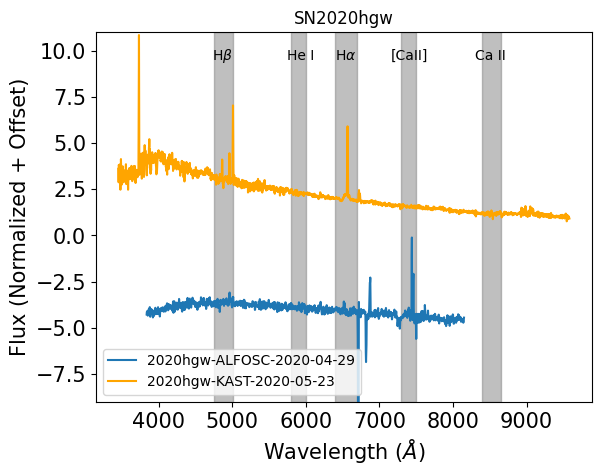

In [12]:
plt.figure()
plt.plot(hgw_ALFOSC_wavelength / (1 + redshifts[0]), hgw_ALFOSC_flux / np.median(hgw_ALFOSC_flux) - 5, label = '2020hgw-ALFOSC-2020-04-29')
plt.plot(hgw_KAST_wavelength / (1 + redshifts[0]), hgw_KAST_flux / np.median(hgw_KAST_flux) * 2, label = '2020hgw-KAST-2020-05-23', color = 'orange')
plt.ylim(-9, 11)
plt.xlabel('Rest Frame Wavelength (Å)', fontsize = 15)
plt.ylabel('Flux (normalized)', fontsize = 15)
plt.title('SN2020hgw')
plt.axvspan(4750, 5010, color='grey', alpha = 0.5)
plt.text(4720, 9.5, r'H$\beta$', fontsize = 10)
plt.axvspan(5800, 6000, color = 'grey', alpha= 0.5)
plt.text(5750, 9.5, r'He I', fontsize = 10)
plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
plt.axvspan(6400, 6700, color = 'grey', alpha = 0.5)
plt.text(6400, 9.5, r'H$\alpha$', fontsize = 10)
plt.axvspan(7300, 7500, color = 'grey', alpha =0.5)
plt.text(7150, 9.5, '[CaII]', fontsize = 10)
plt.axvspan(8400, 8650, color = 'grey', alpha=0.5)
plt.text(8300, 9.5, 'Ca II', fontsize = 10)
plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='lower left')

<>:136: SyntaxWarning: invalid escape sequence '\A'
<>:136: SyntaxWarning: invalid escape sequence '\A'
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/1537626374.py:136: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength $(\AA)$', fontsize = 15)


Text(0.5, 1.0, 'SN 2020jfo spectral sequence')

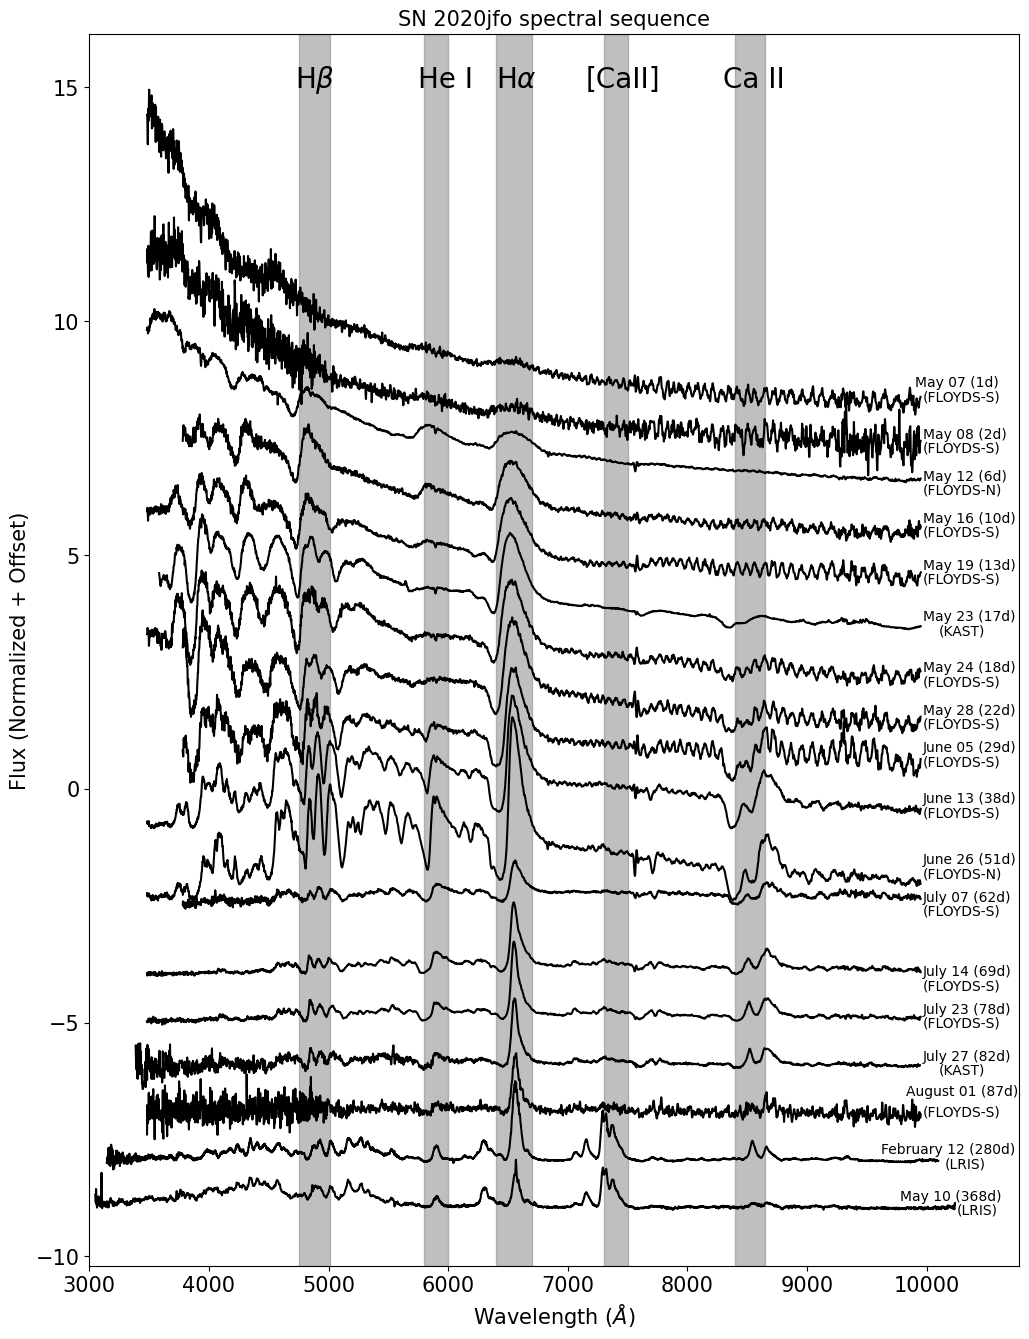

In [13]:
# jfo spectra 

jfo_0507_wl = jfo_0507['col1']
jfo_0507_fx = jfo_0507['col2']

jfo_0508_wl = jfo_0508['col1'] 
jfo_0508_fx = jfo_0508['col2']

jfo_0512_wl = jfo_0512['col1']
jfo_0512_fx = jfo_0512['col2']

jfo_0516_wl = jfo_0516['col1']
jfo_0516_fx = jfo_0516['col2']

jfo_0519_wl = jfo_0519['col1']
jfo_0519_fx = jfo_0519['col2']

jfo_0523_wl = jfo_0523['wavelength']
jfo_0523_fx = jfo_0523['flux']

jfo_0524_wl = jfo_0524['col1']
jfo_0524_fx = jfo_0524['col2']

jfo_0528_wl = jfo_0528['col1']
jfo_0528_fx = jfo_0528['col2']

jfo_0605_wl = jfo_0605['col1']
jfo_0605_fx = jfo_0605['col2']

jfo_0613_wl = jfo_0613['col1']
jfo_0613_fx = jfo_0613['col2']

jfo_0626_wl = jfo_0626['col1']
jfo_0626_fx = jfo_0626['col2']

jfo_0706_wl = jfo_0706['col1']
jfo_0706_fx = jfo_0706['col2']

jfo_0714_wl = jfo_0714['col1']
jfo_0714_fx = jfo_0714['col2']

jfo_0723_wl = jfo_0723['col1']
jfo_0723_fx = jfo_0723['col2']

jfo_0727_wl = jfo_0727['wavelength']
jfo_0727_fx = jfo_0727['flux']

jfo_0801_wl = jfo_0801['col1']
jfo_0801_fx = jfo_0801['col2']

jfo_210212_wl = jfo_210212['wavelength']
jfo_210212_fx = jfo_210212['flux']

jfo_210510_wl = jfo_210510['wavelength']
jfo_210510_fx = jfo_210510['flux']

jfo_z = 1 + redshifts[1] 

plt.figure(figsize=(12, 16))
plt.plot(jfo_0507_wl / jfo_z , jfo_0507_fx / np.median(jfo_0507_fx) + 8, color ='k') #1 days 

plt.plot(jfo_0508_wl / jfo_z, jfo_0508_fx / np.median(jfo_0508_fx) + 7, color ='k') #2d 

plt.plot(jfo_0512_wl / jfo_z, jfo_0512_fx / np.median(jfo_0512_fx) + 6.3, color ='k') #6d 

plt.plot(jfo_0516_wl / jfo_z, jfo_0516_fx / np.median(jfo_0516_fx) + 5, color ='k') #10d 

plt.plot(jfo_0519_wl / jfo_z, jfo_0519_fx / np.median(jfo_0519_fx) + 4, color ='k') #13d 

plt.plot(jfo_0523_wl / jfo_z, jfo_0523_fx / np.median(jfo_0523_fx) + 3, color ='k') #16d 

plt.plot(jfo_0524_wl / jfo_z, jfo_0524_fx / np.median(jfo_0524_fx) + 2, color ='k') #17d 

plt.plot(jfo_0528_wl / jfo_z, jfo_0528_fx / np.median(jfo_0528_fx) + 1, color ='k') #21d 

plt.plot(jfo_0605_wl / jfo_z, jfo_0605_fx / np.median(jfo_0605_fx), color ='k') #29d 

plt.plot(jfo_0613_wl / jfo_z, jfo_0613_fx / np.median(jfo_0613_fx) - 1, color ='k') #37d 

plt.plot(jfo_0626_wl / jfo_z, jfo_0626_fx / np.median(jfo_0626_fx) - 2.5, color ='k') #50d 

plt.plot(jfo_0706_wl / jfo_z, jfo_0706_fx / np.median(jfo_0706_fx)/4 - 2.5, color ='k') 

plt.plot(jfo_0714_wl / jfo_z, jfo_0714_fx / np.median(jfo_0714_fx)/5 - 4, color ='k') 

plt.plot(jfo_0723_wl / jfo_z, jfo_0723_fx / np.median(jfo_0723_fx)/6 - 5, color ='k')

plt.plot(jfo_0727_wl / jfo_z, jfo_0727_fx / np.median(jfo_0727_fx)/7 - 6, color ='k')

plt.plot(jfo_0801_wl / jfo_z, jfo_0801_fx / np.median(jfo_0801_fx)/8 - 7, color ='k')

plt.plot(jfo_210212_wl / jfo_z, jfo_210212_fx / np.median(jfo_210212_fx)/9 - 8, color ='k') 

plt.plot(jfo_210510_wl / jfo_z, jfo_210510_fx / np.median(jfo_210510_fx)/9 - 9, color ='k')

plt.text(9900, 8.6, 'May 07 (1d)')
plt.text(9970, 8.3, '(FLOYDS-S)')
plt.text(9970, 7.5, 'May 08 (2d)')
plt.text(9970, 7.2, '(FLOYDS-S)')
plt.text(9970, 6.6, 'May 12 (6d)')
plt.text(9970, 6.3,'(FLOYDS-N)')
plt.text(9970, 5.7, 'May 16 (10d)')
plt.text(9970, 5.4, '(FLOYDS-S)')
plt.text(9970, 4.7, 'May 19 (13d)')
plt.text(9970, 4.4, '(FLOYDS-S)')
plt.text(9970, 3.6, 'May 23 (17d)')
plt.text(10100, 3.3, '(KAST)')
plt.text(9970, 2.5, 'May 24 (18d)')
plt.text(9970, 2.2, '(FLOYDS-S)')
plt.text(9970, 1.6, 'May 28 (22d)')
plt.text(9970, 1.3, '(FLOYDS-S)')
plt.text(9970, 0.8, 'June 05 (29d)')
plt.text(9970, 0.5, '(FLOYDS-S)')
plt.text(9970, -0.3, 'June 13 (38d)')
plt.text(9970, -0.6, '(FLOYDS-S)')
plt.text(9970, -1.6, 'June 26 (51d)')
plt.text(9970, -1.9, '(FLOYDS-N)')
plt.text(9970, -2.4, 'July 07 (62d)')
plt.text(9970, -2.7, '(FLOYDS-S)')
plt.text(9970, -4.0, 'July 14 (69d)')
plt.text(9970, -4.3, '(FLOYDS-S)')
plt.text(9970, -4.8, 'July 23 (78d)')
plt.text(9970, -5.1, '(FLOYDS-S)')
plt.text(9970, -5.8, 'July 27 (82d)')
plt.text(10100, -6.1, '(KAST)')
plt.text(9830, -6.55, 'August 01 (87d)')
plt.text(9970, -7.0, '(FLOYDS-S)')
plt.text(9620, -7.8, 'February 12 (280d)')
plt.text(10150, -8.1, '(LRIS)')
plt.text(9780, -8.8, 'May 10 (368d)')
plt.text(10250, -9.1, '(LRIS)')
plt.axvspan(4750, 5010, color='grey', alpha = 0.5)
plt.text(4720, 15, r'H$\beta$', fontsize = 20)
plt.axvspan(5800, 6000, color = 'grey', alpha= 0.5)
plt.text(5750, 15, r'He I', fontsize = 20)
plt.xlabel('Wavelength $(\AA)$', fontsize = 15)
plt.axvspan(6400, 6700, color = 'grey', alpha = 0.5)
plt.text(6400, 15, r'H$\alpha$', fontsize = 20)
plt.axvspan(7300, 7500, color = 'grey', alpha =0.5)
plt.text(7150, 15, '[CaII]', fontsize = 20)
plt.axvspan(8400, 8650, color = 'grey', alpha=0.5)
plt.text(8300, 15, 'Ca II', fontsize = 20)
plt.ylabel('Flux (Normalized + Offset)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(3000, 10775)
plt.title('SN 2020jfo spectral sequence', fontsize = 15)

popt: [-8.81626338e-02  5.92387198e+03  7.91730823e+00] pcov: [[3.13286511e-05 4.20352593e-07 1.87700251e-03]
 [4.20352593e-07 1.68401526e-01 8.57340422e-05]
 [1.87700251e-03 8.57340422e-05 3.37159466e-01]]


<>:127: SyntaxWarning: invalid escape sequence '\A'
<>:127: SyntaxWarning: invalid escape sequence '\A'
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/2743850598.py:127: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)


Text(0.5, 0, 'Rest Frame Wavelength $(\\AA)$')

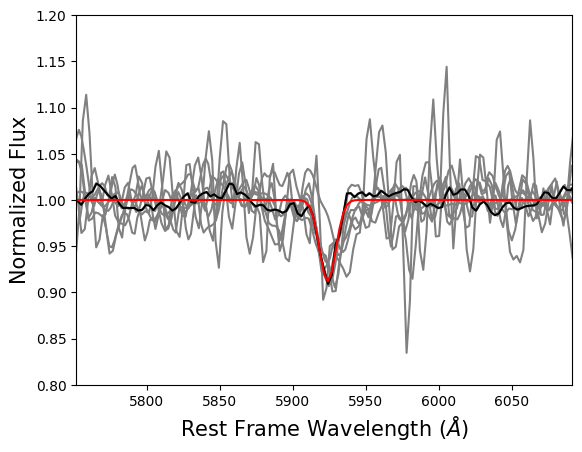

In [14]:
# jfo 
# only wan early time spectra, closest to explosion 
jfo_centroid = na_rest_wavelength * (1 + redshifts[1])

lower_mask = jfo_centroid - 20 
upper_mask = jfo_centroid + 20 

#0507
mask_0507 = (jfo_0507_wl > lower_mask) & (jfo_0507_wl < upper_mask) 
continuum_0507 = ((jfo_0507_wl > (lower_mask - 150)) & (jfo_0507_wl < (lower_mask - 10))|(jfo_0507_wl > (upper_mask + 10)) & (jfo_0507_wl < (upper_mask + 150)))
coeff_jfo_0507 = np.polyfit(jfo_0507_wl[continuum_0507], jfo_0507_fx[continuum_0507], 3)
p_jfo0507 = np.poly1d(coeff_jfo_0507)

jfo_0507_fx_norm = jfo_0507_fx / p_jfo0507(jfo_0507_wl) 


#0508
mask_0508 = (jfo_0508_wl > lower_mask) & (jfo_0508_wl < upper_mask) 
continuum_0508 = ((jfo_0508_wl > (lower_mask - 150)) & (jfo_0508_wl < (lower_mask - 10))|(jfo_0508_wl > (upper_mask + 10)) & (jfo_0508_wl < (upper_mask + 150)))
coeff_jfo_0508 = np.polyfit(jfo_0508_wl[continuum_0508], jfo_0508_fx[continuum_0508], 3)
p_jfo0508 = np.poly1d(coeff_jfo_0508)

jfo_0508_fx_norm = jfo_0508_fx / p_jfo0508(jfo_0508_wl) 


#0512
mask_0512 = (jfo_0512_wl > lower_mask) & (jfo_0512_wl < upper_mask) 
continuum_0512 = ((jfo_0512_wl > (lower_mask - 150)) & (jfo_0512_wl < (lower_mask - 10))|(jfo_0512_wl > (upper_mask + 10)) & (jfo_0512_wl < (upper_mask + 150)))
coeff_jfo_0512 = np.polyfit(jfo_0512_wl[continuum_0512], jfo_0512_fx[continuum_0512], 3)
p_jfo0512 = np.poly1d(coeff_jfo_0512)

jfo_0512_fx_norm = jfo_0512_fx / p_jfo0512(jfo_0512_wl)
 

#0516
mask_0516 = (jfo_0516_wl > lower_mask) & (jfo_0516_wl < upper_mask) 
continuum_0516 = ((jfo_0516_wl > (lower_mask - 150)) & (jfo_0516_wl < (lower_mask - 10))|(jfo_0516_wl > (upper_mask + 10)) & (jfo_0516_wl < (upper_mask + 150)))
coeff_jfo_0516 = np.polyfit(jfo_0516_wl[continuum_0516], jfo_0516_fx[continuum_0516], 3)
p_jfo0516 = np.poly1d(coeff_jfo_0516)

jfo_0516_fx_norm = jfo_0516_fx / p_jfo0516(jfo_0516_wl)
 

#0519
mask_0519 = (jfo_0519_wl > lower_mask) & (jfo_0519_wl < upper_mask) 
continuum_0519 = ((jfo_0519_wl > (lower_mask - 150)) & (jfo_0519_wl < (lower_mask - 10))|(jfo_0519_wl > (upper_mask + 10)) & (jfo_0519_wl < (upper_mask + 150)))
coeff_jfo_0519 = np.polyfit(jfo_0519_wl[continuum_0519], jfo_0519_fx[continuum_0519], 3)
p_jfo0519 = np.poly1d(coeff_jfo_0519)

jfo_0519_fx_norm = jfo_0519_fx / p_jfo0519(jfo_0519_wl)
 
#0523
mask_0523 = (jfo_0523_wl > lower_mask) & (jfo_0523_wl < upper_mask) 
continuum_0523 = ((jfo_0523_wl > (lower_mask - 150)) & (jfo_0523_wl < (lower_mask - 10))|(jfo_0523_wl > (upper_mask + 10)) & (jfo_0523_wl < (upper_mask + 150)))
coeff_jfo_0523 = np.polyfit(jfo_0523_wl[continuum_0523], jfo_0523_fx[continuum_0523], 3)
p_jfo0523 = np.poly1d(coeff_jfo_0523)

jfo_0523_fx_norm = jfo_0523_fx / p_jfo0523(jfo_0523_wl)
 

#0524
mask_0524 = (jfo_0524_wl > lower_mask) & (jfo_0524_wl < upper_mask) 
continuum_0524 = ((jfo_0524_wl > (lower_mask - 150)) & (jfo_0524_wl < (lower_mask - 10))|(jfo_0524_wl > (upper_mask + 10)) & (jfo_0524_wl < (upper_mask + 150)))
coeff_jfo_0524 = np.polyfit(jfo_0524_wl[continuum_0524], jfo_0524_fx[continuum_0524], 3)
p_jfo0524 = np.poly1d(coeff_jfo_0524)

jfo_0524_fx_norm = jfo_0524_fx / p_jfo0524(jfo_0524_wl)
 

#0528
mask_0528 = (jfo_0528_wl > lower_mask) & (jfo_0528_wl < upper_mask) 
continuum_0528 = ((jfo_0528_wl > (lower_mask - 150)) & (jfo_0528_wl < (lower_mask - 10))|(jfo_0528_wl > (upper_mask + 10)) & (jfo_0528_wl < (upper_mask + 150)))
coeff_jfo_0528 = np.polyfit(jfo_0528_wl[continuum_0528], jfo_0528_fx[continuum_0528], 3)
p_jfo0528 = np.poly1d(coeff_jfo_0528)

jfo_0528_fx_norm = jfo_0528_fx / p_jfo0528(jfo_0528_wl)
 
plt.plot(jfo_0507_wl, jfo_0507_fx_norm, color = 'gray')
plt.plot(jfo_0508_wl, jfo_0508_fx_norm, color = 'gray')
plt.plot(jfo_0512_wl, jfo_0512_fx_norm, color = 'gray')
plt.plot(jfo_0516_wl, jfo_0516_fx_norm, color = 'gray')
plt.plot(jfo_0519_wl, jfo_0519_fx_norm, color = 'gray')
plt.plot(jfo_0523_wl, jfo_0523_fx_norm, color = 'gray')
plt.plot(jfo_0524_wl, jfo_0524_fx_norm, color = 'gray')
plt.plot(jfo_0528_wl, jfo_0528_fx_norm, color = 'gray') 

jfo_wl_list = [jfo_0507_wl, jfo_0508_wl, jfo_0512_wl, jfo_0516_wl, jfo_0519_wl, jfo_0523_wl, jfo_0524_wl, jfo_0528_wl]
jfo_flux_list = [jfo_0507_fx, jfo_0508_fx, jfo_0512_fx, jfo_0516_fx, jfo_0519_fx, jfo_0523_fx, jfo_0524_fx, jfo_0528_fx]


jfo_wl_min = min([wl.min() for wl in jfo_wl_list])
jfo_wl_max = max(wl.max() for wl in jfo_wl_list)


jfo_wl = np.linspace(jfo_wl_min, jfo_wl_max, 2500)
interp_fluxes = [] 
for i in range(len(jfo_wl_list)):
    inter = i1(jfo_wl_list[i], jfo_flux_list[i], fill_value="extrapolate")
    int_flux = inter(jfo_wl)
    interp_fluxes.append(int_flux)


avg_fluxes = np.mean(np.array(interp_fluxes), axis=0)
mask_jfo = (jfo_wl > lower_mask) & (jfo_wl < upper_mask) 
continuum_jfo = ((jfo_wl > (lower_mask - 150)) & (jfo_wl < (lower_mask - 10))|(jfo_wl > (upper_mask + 10)) & (jfo_wl < (upper_mask + 150)))
coeff_jfo = np.polyfit(jfo_wl[continuum_jfo], avg_fluxes[continuum_jfo], 3)
p_jfo = np.poly1d(coeff_jfo)

norm_avg_fluxes = avg_fluxes / p_jfo(jfo_wl)


plt.plot(jfo_wl, norm_avg_fluxes, color = 'k', label = '20jfo average')


def gauss(x, *params):
    peak, wl, fwhm = params
    y = peak * np.exp(-(x - wl)**2 / fwhm**2)
    return y+1 
p0 = 0.2, 5927, 6
coeff_jfo_avg = np.polyfit(jfo_wl[mask_jfo], norm_avg_fluxes[mask_jfo], 2)
popt, pcov = curve_fit(gauss, jfo_wl[mask_jfo], norm_avg_fluxes[mask_jfo], p0=p0)
print('popt:', popt, 'pcov:',pcov)
plt.plot(jfo_wl, gauss(jfo_wl, *popt), color = 'r')
plt.xlim(lower_mask - 150, upper_mask + 150)
plt.ylim(0.8, 1.2)
plt.ylabel('Normalized Flux', fontsize = 15)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 15)


<>:18: SyntaxWarning: invalid escape sequence '\A'
<>:18: SyntaxWarning: invalid escape sequence '\A'
/var/folders/73/js4b1csn7y31f81w1_q_h4rw0000gp/T/ipykernel_4391/2842001972.py:18: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 20)


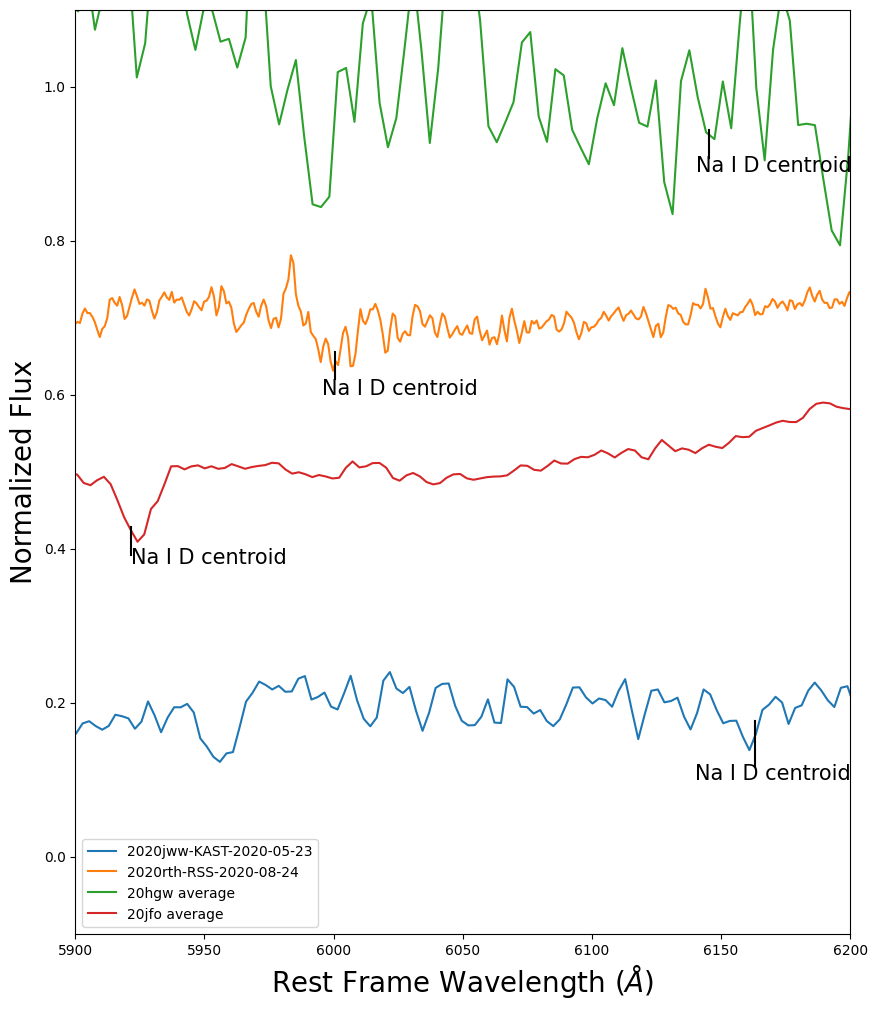

In [15]:
#make all Na I D lines one plot 
plt.figure(figsize=(10, 12)) 
plt.plot(jww_KAST_wavelength, jww_flux_norm/5, label = '2020jww-KAST-2020-05-23')
plt.plot(rth_wavelength, rth_flux_norm -0.3, label = '2020rth-RSS-2020-08-24')
plt.plot(hgw_wl, hgw_flux_norm, label = '20hgw average')
plt.plot(jfo_wl, norm_avg_fluxes-.5, label = '20jfo average')
plt.xlim((5900), (6200))

plt.axvline(jww_centroid, 0.18, 0.23, color = 'k')
plt.axvline(rth_centroid, 0.60, 0.63, color = 'k')
plt.axvline(hgw_centroid, 0.84, 0.87, color = 'k')
plt.axvline(jfo_centroid, 0.41, 0.44, color = 'k')
plt.text(jww_centroid-23, 0.1, 'Na I D centroid', fontsize = 15)
plt.text(rth_centroid-5, 0.6, 'Na I D centroid', fontsize = 15)
plt.text(hgw_centroid-5, 0.89, 'Na I D centroid', fontsize = 15)
plt.text(jfo_centroid, 0.38, 'Na I D centroid', fontsize = 15)
plt.ylim(-0.1, 1.1)
plt.xlabel('Rest Frame Wavelength $(\AA)$', fontsize = 20)
plt.ylabel('Normalized Flux', fontsize = 20)
plt.legend()

In [33]:
plt.style.use('./all_YSE_phot/format.mplstyle')
colors = {'2020hgw': np.array([0.13921569, 0.5368666 , 0.96012164, 1.        ]),
        '2020jfo': np.array([0.30980392, 1.0, 0.55538273, 1.        ]),
          '2020jww': np.array([0.95882353, 0.75133189, 0.41235632, 1.        ]),
          '2020rth': np.array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00])}


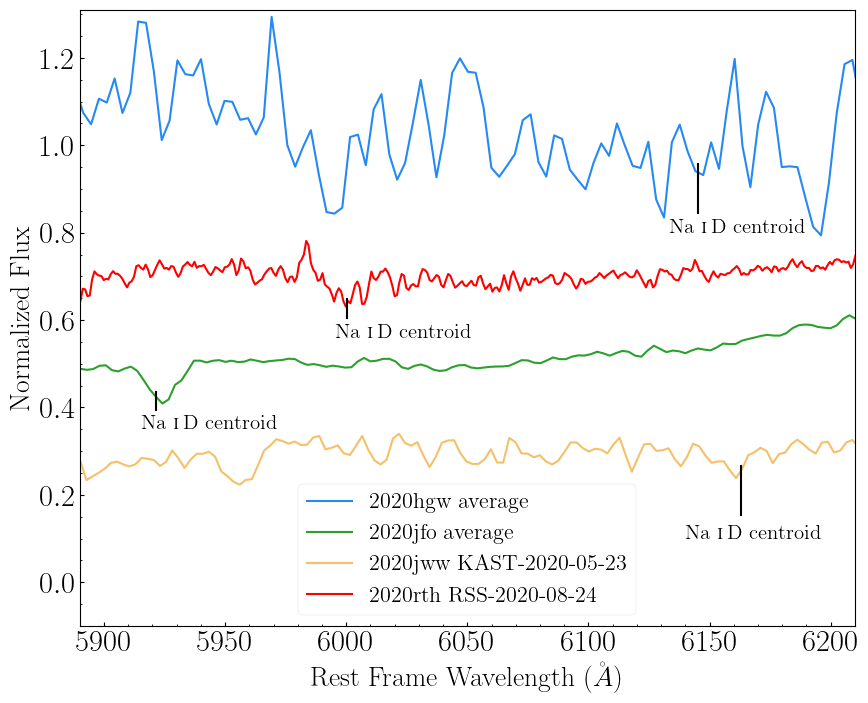

In [89]:
#make all Na I D lines one plot 
plt.figure(figsize=(10, 8)) 
plt.plot(hgw_wl, hgw_flux_norm, label = '2020hgw average', color = colors['2020hgw'])
plt.plot(jfo_wl, norm_avg_fluxes-.5, label = '2020jfo average', color = 'tab:green')
plt.plot(jww_KAST_wavelength, jww_flux_norm/5 + 0.1, label = '2020jww KAST-2020-05-23', color = colors['2020jww'])
plt.plot(rth_wavelength, rth_flux_norm -0.3, label = '2020rth RSS-2020-08-24', color = colors['2020rth'])

plt.xlim((5890), (6210))

plt.axvline(jww_centroid, 0.18, 0.26, color = 'k')
plt.axvline(rth_centroid, 0.5, 0.53, color = 'k')
plt.axvline(hgw_centroid, 0.67, 0.75, color = 'k')
plt.axvline(jfo_centroid, 0.35, 0.38, color = 'k')

naid_label = r'Na \textsc{i}\,D centroid'
plt.text(jww_centroid-23, 0.1, naid_label, fontsize = 15)
plt.text(rth_centroid-5, 0.56, naid_label, fontsize = 15)
plt.text(hgw_centroid-12, 0.8, naid_label, fontsize = 15)
plt.text(jfo_centroid-6, 0.35, naid_label, fontsize = 15)
plt.ylim(-0.1, 1.31)
plt.xlabel(r'Rest Frame Wavelength $(\AA)$', fontsize = 20)
plt.ylabel('Normalized Flux', fontsize = 20)
plt.legend()

plt.savefig('./all_YSE_phot/paper_plots/all_na.pdf')

In [30]:
np.array([0.40980392, 0.98998021, 0.75538273])*255

array([104.4999996 , 252.44495355, 192.62259615])